<!-- INDICE  -->
<p style='text-align:center;background-color:#f4c272;color:#008b8b;font-weight:800;font-size:35px;border-radius:10px 10px 0 0;'>Indice:</p>

<!-- Cuadro darkcyan de fondo -->
<div style='background-color:#008b8b;padding:15px;margin-top:-35px;border-radius:0 0 10px 10px'>

<!-- Titulo de Día 1 -->
<p style='font-size:25px;font-weight:700;color:#2efbcd'> Day 1 | Handling Missing Values </p>

<ol> <!-- Lista de temas -->
    <a href='#tema1'><li style='font-weight:500;font-size:18px;color:#4a235a;padding-bottom:8px;'>Take a first look at the data</li></a>
    <a href='#tema2'><li style='font-weight:500;font-size:18px;color:#4a235a;padding-bottom:8px;'>See how many missing data points we have</li></a>
    <a href='#tema3'><li style='font-weight:500;font-size:18px;color:#4a235a;padding-bottom:8px;'>Figure out why the data is missing</li></a>
    <a href='#tema4'><li style='font-weight:500;font-size:18px;color:#4a235a;padding-bottom:8px;'>Drop missing values</li></a>
    <a href='#tema5'><li style='font-weight:500;font-size:18px;color:#4a235a;padding-bottom:8px;'>Filling in missing values</li></a>
</ol>

<!-- FUENTES -->
<p style='font-weight:700;margin-bottom:5px;font-size:20px;color:#2efbcd'>Fuentes

<ul> <!-- LISTA DE FUENTES -->
    <a href='https://www.kaggle.com/code/rtatman/data-cleaning-challenge-handling-missing-values' style='color:#4a235a;font-weight:700;'><li>Data Cleaning Challenge</li></a>

#
---
<p id='' style='padding:15px;background-color:#4a235a;text-align:center;font-size:30px;font-weight:800;color:#2efbcd;'> Day 1: Handling Missing Values

> Fuentes: https://www.kaggle.com/code/rtatman/data-cleaning-challenge-handling-missing-values

## <p id='tema1' style='text-align:center;background-color:#f4c272;color:#008b8b;font-weight:800;font-size:25px;border-radius:15px;padding:10px;'>Take a first look at the data</p>

In [1]:
# Importamos las librerias
import pandas as pd
import numpy as np

In [2]:
# Cargamos el Dataset
nfl_data = pd.read_csv('../datasets/NFL Play by Play 2009-2017 (v4).csv')

sf_permits = pd.read_csv('../datasets/Building_Permits.csv')

# Colocamos una semilla para que los resultados sean siempre iguales
np.random.seed(0)

C:\Users\Frank Ibarra\AppData\Local\Temp\ipykernel_100792\4098448819.py:2: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data = pd.read_csv('../datasets/NFL Play by Play 2009-2017 (v4).csv')
C:\Users\Frank Ibarra\AppData\Local\Temp\ipykernel_100792\4098448819.py:4: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_permits = pd.read_csv('../datasets/Building_Permits.csv')


In [3]:
# [sample], a diferencia de [head], muestra valores aleatorios del dataset
nfl_data.sample(3)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
244485,2014-10-26,2014102607,18,3,1.0,00:39,1,939.0,12.0,TB,...,1.240299,0.225647,0.774353,0.245582,0.754418,0.225647,0.019935,-0.018156,0.038091,2014
115340,2011-11-20,2011112000,22,4,1.0,06:47,7,407.0,44.0,OAK,...,NaN,0.056036,0.943964,0.042963,0.957037,0.943964,0.013073,NaN,NaN,2011
68357,2010-11-14,2010111401,8,2,NaN,00:23,1,1823.0,0.0,CLE,...,NaN,0.365307,0.634693,0.384697,0.615303,0.634693,-0.019390,NaN,NaN,2010


## <p id='tema2' style='text-align:center;background-color:#f4c272;color:#008b8b;font-weight:800;font-size:25px;border-radius:15px;padding:10px;'>See how many missing data points we have</p>

In [4]:
nfl_data.isnull().sum().head(10)

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

Para saber el total de los datos puedes:

Utilizar la librería de <b style='color:#ffccdd'>Numpy</b>
- `np.prod([DataFrame].shape)`

Utilizar únicamente <b style='color:#2efbcd'>Pandas</b>
- `[DataFrame].size`

Por ejemplo:

In [5]:
print('Numpy:',np.prod(nfl_data.size))

print('Pandas:',nfl_data.size)

Numpy: 41584176
Pandas: 41584176


Porcentaje de valores nulos en todo el DataFrame

In [6]:
# Sumamos todos los valores nulos que existan en el DataFrame
missing_values = nfl_data.isnull().sum().sum()

# Dividimos y multiplicamos por cien para conocer el porcentaje
print(f'Porcentaje de valores NULOS: {((missing_values / nfl_data.size) * 100).round(2)}')

Porcentaje de valores NULOS: 27.67


## <p id='tema3' style='text-align:center;background-color:#f4c272;color:#008b8b;font-weight:800;font-size:25px;border-radius:15px;padding:10px;'>Figure out why the data is missing</p>

In [7]:
missing_values_col = nfl_data.isnull().sum()
missing_values_col[:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

### Your turn!

- Look at the columns `Street Number Suffix` and `Zipcode` from the `sf_permits` dataset.

Both of these contain missing values. Which, if either, of these are missing because they don't exist? Which, if either, are missing because they weren't recorder?

In [8]:
sf_permits[['Street Number Suffix','Zipcode']].sample(5)

,Street Number Suffix,Zipcode
78651,NaN,94110.0
177779,NaN,94109.0
64978,NaN,94109.0
165958,NaN,94114.0
147902,NaN,94109.0


In [9]:
sf_permits['Street Number Suffix'].value_counts()

Street Number Suffix
A    1501
B     291
V     228
C      56
E      28
F      24
G      12
D      11
K      11
H      11
R      10
L      10
J       9
I       7
P       3
N       2
0       1
½       1
Name: count, dtype: int64

In [10]:
# Cantidad total de datos | STREET NUMBER SUFFIX
sf_permits['Street Number Suffix'].size

198900

In [11]:
# Cantidad de valores existentes | STREET NUMBER SUFFIX
sf_permits['Street Number Suffix'].size - sf_permits['Street Number Suffix'].isnull().sum()

np.int64(2216)

In [12]:
# Porcentaje de valores nulos | STREET NUMBER SUFFIX
(sf_permits['Street Number Suffix'].isnull().sum() / sf_permits['Street Number Suffix'].size) * 100

np.float64(98.88587229763701)

In [13]:
# Porcentaje de valores nulos | ZIPCODE
(sf_permits['Zipcode'].isnull().sum() / sf_permits['Zipcode'].size) * 100

np.float64(0.8627450980392156)

En mi criterio, los valores nulos son porque:
- `Zipcode` No se registraron
- `Street Number Suffix` Faltan hasta el 98% de los datos, por lo que será mejor eliminar esa columna

## <p id='tema4' style='text-align:center;background-color:#f4c272;color:#008b8b;font-weight:800;font-size:25px;border-radius:15px;padding:10px;'>Drop missing values</p>

In [16]:
nfl_data.shape

(407688, 102)

In [21]:
# Borra todas las columnas que contengan valores Nulos

# axis 0 = Filas
# axis 1 = Columnas

nfl_data.dropna(axis=1).head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,AwayTeam,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009


Try removing all the rows from the sf_permits dataset that contain missing values. How many are left?

In [30]:
print(f'Dataset Complete: {sf_permits.shape}\n')

print(f'Dataset Without Nulls Rows: {sf_permits.dropna(axis=0).shape}\n')

Dataset Complete: (198900, 43)

Dataset Without Nulls Rows: (0, 43)



Now try removing all the columns with empy values. Now how much of our data is left?

In [29]:
print(f'Dataset Complete: {sf_permits.shape}\n')

print(f'Dataset Without Nulls Columns: {sf_permits.dropna(axis=1).shape}')

Dataset Complete: (198900, 43)

Dataset Without Nulls Columns: (198900, 12)


## <p id='tema5' style='text-align:center;background-color:#f4c272;color:#008b8b;font-weight:800;font-size:25px;border-radius:15px;padding:10px;'>Filling in missing values</p>

In [38]:
# Get a small subset of the NFL dataset
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


Otra forma de rellenar valores nulos podría ser `colocando el valor siguiente` en los datos, esto tiene sentido cuando los datos llevan un orden.

In [56]:
# Replace all NA's the value that comes direectly after it in the same column,
# Then replace all the remaining na's with 0

# ffil = Utiliza el valor anterior para rellenar el Nulo
# bfill = Utiliza el valor siguiente para rellenar el Nulo

subset_nfl_data.fillna(method='bfill',axis=0).fillna(0)

C:\Users\Frank Ibarra\AppData\Local\Temp\ipykernel_100792\3784681097.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset_nfl_data.fillna(method='bfill',axis=0).fillna(0)


,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


`Intentalo tú:`

Remplaza todos los NaN's en `sf_permits`con el valor que sigue despues del nulo, y los restantes con 0

In [62]:
sf_permits.fillna(method='bfill',axis=0).fillna(0).head()

C:\Users\Frank Ibarra\AppData\Local\Temp\ipykernel_100792\3237390032.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sf_permits.fillna(method='bfill',axis=0).fillna(0).head()


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,A,Ellis,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,A,Geary,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,A,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,Y,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,A,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,A,Market,St,...,3.0,constr type 3,1.0,constr type 1,Y,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


#
---
<p id='' style='padding:15px;background-color:#4a235a;text-align:center;font-size:30px;font-weight:800;color:#2efbcd;'> Day 2: Scaling and Normalization

- Fuentes: https://www.kaggle.com/code/rtatman/data-cleaning-challenge-scale-and-normalize-data

Primero preparamos el ambiente

In [1]:
# Lectura de los datos
import pandas as pd
import numpy as np

# Modulos para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Para Box-Cox Transformación 
from scipy import stats

# Para Min_Max Escalados (Machine Learning Extensions)
from mlxtend.preprocessing import minmax_scaling

In [2]:
kickstarters_2017 = pd.read_csv('../datasets/ks-projects-201801.csv')
kickstarters_2017.head(3)

# Set seed for reproducibility
np.random.seed(0)

## <p id='tema1' style='text-align:center;background-color:#f4c272;color:#008b8b;font-weight:800;font-size:25px;border-radius:15px;padding:10px;'>Practice Scaling</p>

In [3]:
kickstarters_2017.usd_goal_real

0          1533.95
1         30000.00
2         45000.00
3          5000.00
4         19500.00
            ...   
378656    50000.00
378657     1500.00
378658    15000.00
378659    15000.00
378660     2000.00
Name: usd_goal_real, Length: 378661, dtype: float64

In [8]:
kickstarters_2017.shape

(378661, 15)

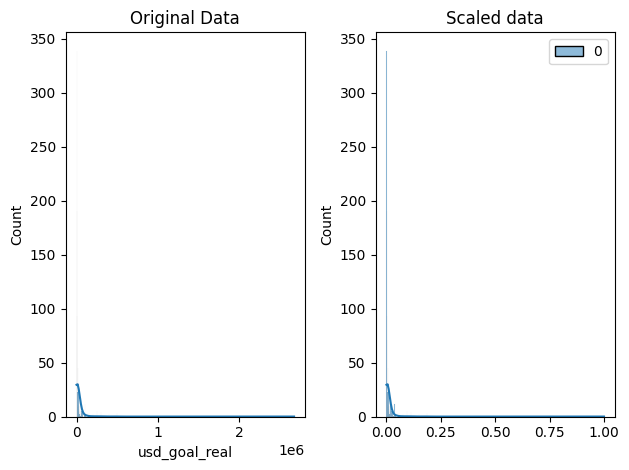

In [12]:
# Select the usd_goal_real column
usd_goal = kickstarters_2017.usd_goal_real.head(1000)
usd_goal = usd_goal.to_numpy() # Esto es necesario para "minmax_scaling"

# Scale the goals from 0 to 1
scaled_data = minmax_scaling(usd_goal, columns=[0])

# Plot the original & scaled data together to compare
fig, ax = plt.subplots(1,2)

sns.histplot(kickstarters_2017['usd_goal_real'].head(1000), ax=ax[0], kde=True)
ax[0].set_title('Original Data')

sns.histplot(scaled_data, ax=ax[1], kde=True)
ax[1].set_title('Scaled data')

plt.tight_layout()
plt.show()

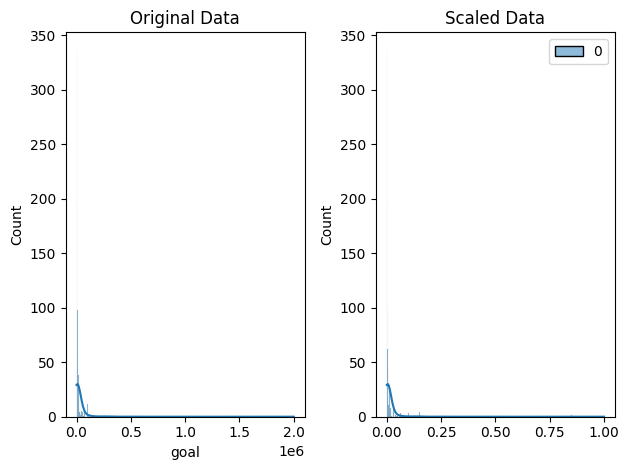

In [17]:
goal = kickstarters_2017.goal.head(1000)
goal = goal.to_numpy()

scaled_goal = minmax_scaling(goal, columns=[0])

fig, ax = plt.subplots(1,2)

sns.histplot(kickstarters_2017.goal.head(1000),kde=True,ax=ax[0])
ax[0].set_title('Original Data')

sns.histplot(scaled_goal,kde=True,ax=ax[1])
ax[1].set_title('Scaled Data')

plt.tight_layout()
plt.show()

## <p id='tema1' style='text-align:center;background-color:#f4c272;color:#008b8b;font-weight:800;font-size:25px;border-radius:15px;padding:10px;'>Practice Normalization</p>